In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'D:\\sc_2018_bike\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Mon, 20 Apr 2020 10:17


In [4]:
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))

# Add mode share by work_place field
_df = df.groupby('work_place').sum()[['modeled','observed']].reset_index()
_df = _df.merge(df, on='work_place', suffixes=['_geog_total','_mode_total'])
_df['observed_mode_share'] = _df['observed_mode_total']/_df['observed_geog_total']
_df['modeled_mode_share'] = _df['modeled_mode_total']/_df['modeled_geog_total']
_df[['work_place','mode','modeled_mode_total','observed_mode_total','percent_diff','diff','modeled_mode_share','observed_mode_share']]

,work_place,mode,modeled_mode_total,observed_mode_total,percent_diff,diff,modeled_mode_share,observed_mode_share
0,Auburn,auto,32978,33431,-0.01,-453,0.93,0.94
1,Auburn,transit,1220,691,0.77,529,0.03,0.02
2,Auburn,walk_and_bike,1433,1355,0.06,78,0.04,0.04
3,Bellevue,auto,89323,96761,-0.08,-7438,0.86,0.84
4,Bellevue,transit,7243,12505,-0.42,-5262,0.07,0.11
5,Bellevue,walk_and_bike,6919,6464,0.07,455,0.07,0.06
6,Everett,auto,62904,81741,-0.23,-18837,0.91,0.92
7,Everett,transit,1877,2766,-0.32,-889,0.03,0.03
8,Everett,walk_and_bike,4283,3961,0.08,322,0.06,0.04
9,Federal Way,auto,22652,27590,-0.18,-4938,0.92,0.93


r^2 : 0.944496884301


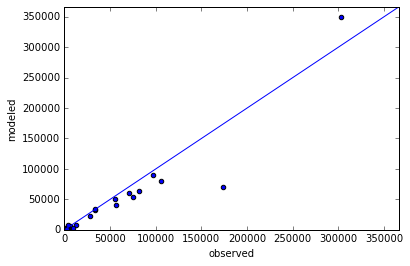

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [7]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [8]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,0.93,0.94,auto,-0.02,-0.02
3,Bellevue,0.86,0.84,auto,0.03,0.03
6,Everett,0.91,0.92,auto,-0.01,-0.01
9,Federal Way,0.92,0.93,auto,-0.01,-0.01
12,Kent,0.92,0.92,auto,-0.00,-0.00
15,Kirkland,0.90,0.87,auto,0.04,0.04
18,Redmond,0.90,0.85,auto,0.06,0.05
21,Renton,0.90,0.91,auto,-0.00,-0.00
24,Seattle,0.74,0.55,auto,0.34,0.19
27,Tacoma,0.90,0.94,auto,-0.04,-0.04


r^2 : 0.971877647156


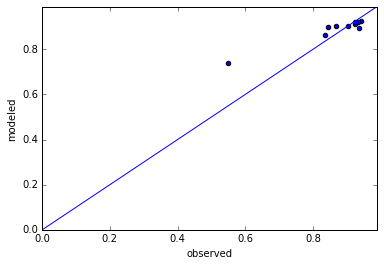

In [9]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [10]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0.03,0.02,transit,0.76,0.01
4,Bellevue,0.07,0.11,transit,-0.35,-0.04
7,Everett,0.03,0.03,transit,-0.13,-0.00
10,Federal Way,0.02,0.00,transit,5.03,0.02
13,Kent,0.04,0.05,transit,-0.23,-0.01
16,Kirkland,0.03,0.09,transit,-0.68,-0.06
19,Redmond,0.05,0.11,transit,-0.52,-0.05
22,Renton,0.05,0.04,transit,0.07,0.00
25,Seattle,0.15,0.32,transit,-0.53,-0.17
28,Tacoma,0.01,0.03,transit,-0.66,-0.02


r^2 : 0.949959701476


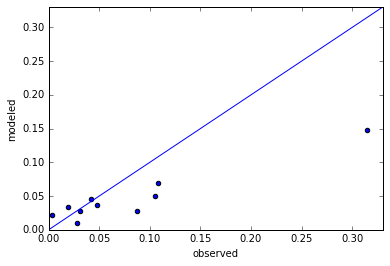

In [11]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [12]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0.04,0.04,walk_and_bike,0.05,0.00
5,Bellevue,0.07,0.06,walk_and_bike,0.20,0.01
8,Everett,0.06,0.04,walk_and_bike,0.39,0.02
11,Federal Way,0.06,0.06,walk_and_bike,-0.11,-0.01
14,Kent,0.04,0.03,walk_and_bike,0.51,0.01
17,Kirkland,0.07,0.05,walk_and_bike,0.51,0.02
20,Redmond,0.05,0.05,walk_and_bike,0.01,0.00
23,Renton,0.05,0.05,walk_and_bike,-0.02,-0.00
26,Seattle,0.11,0.14,walk_and_bike,-0.17,-0.02
29,Tacoma,0.10,0.03,walk_and_bike,1.72,0.06


r^2 : 0.688419373138


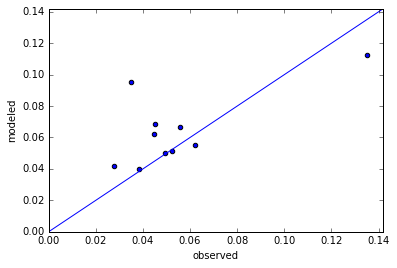

In [13]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))
pd.options.display.float_format = '{:0,.0f}'.format

In [15]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,"1,023,188","1,045,488"
1,Kitsap,"89,130","110,131"
2,Pierce,"229,962","363,777"
3,Snohomish,"234,111","367,425"


In [16]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [17]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

## SOV

 r^2: 0.732611254106


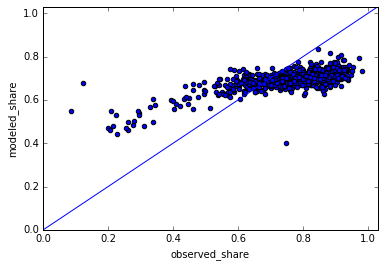

In [18]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## HOV

 r^2: 0.261186661935


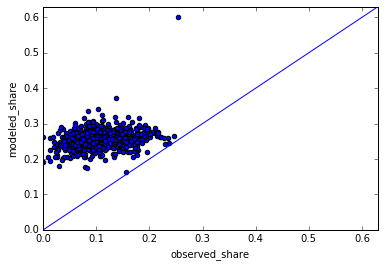

In [19]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Transit

 r^2: 0.663163644774


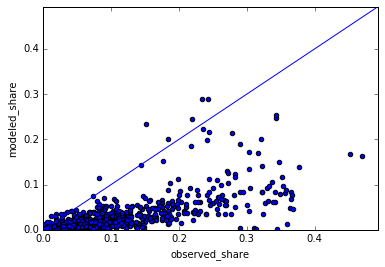

In [20]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

## Walk

 r^2: 0.548698239906


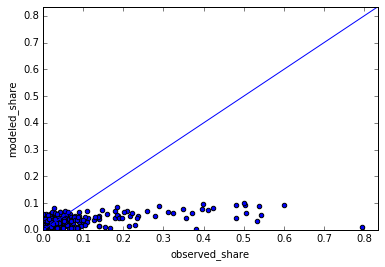

In [21]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

# Commute Flow
----

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','district_worker_flows.csv'))
# Load district names
df_lookup = pd.read_csv(r'../../../inputs/model/lookup/TAZ_TAD_County.csv')

In [23]:
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_o', right_on='District')
df.rename(columns={'New DistrictName': 'Origin District'}, inplace=True)
df = df.merge(df_lookup[['District','New DistrictName']], left_on='District_d', right_on='District')
df.rename(columns={'New DistrictName': 'Destination District'}, inplace=True)
df = df[['District_o','District_d','Origin District','Destination District','modeled','observed']]

r^2 : 0.994732130709


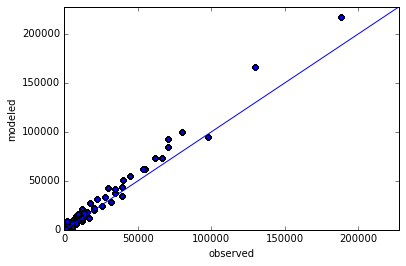

In [24]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

Modeled

In [25]:
df_m = pd.pivot_table(df, index='Origin District', columns='Destination District', values='modeled')
df_m

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,216917,10156,191,15260,31119,16,34004,1023,9930,951,14821
Everett-Lynwood-Edmonds,17441,73571,107,16882,1918,2,11427,53,17705,74,2982
Kitsap,276,55,99801,299,128,4314,5450,133,2,306,288
North Seattle-Shoreline,20287,12348,191,73605,6873,1,61692,184,3701,245,13427
Renton-FedWay-Kent,28443,819,318,6299,166056,139,33060,13795,472,14217,24470
S.Kitsap,49,2,8982,22,391,16617,51,694,1,1531,75
Seattle CBD,12240,1680,204,21142,6860,3,84916,148,470,219,15583
South Pierce,4701,140,416,1142,42098,969,6737,94599,71,50634,3859
Suburban Snohomish,43099,62312,39,12160,2600,1,9235,68,92857,92,2752


Observed

In [26]:
df_o = pd.pivot_table(df, index='Origin District', columns='Destination District', values='observed')
df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"188,214","8,517",228,"10,654","21,988",28,"38,816",993,"5,873",987,"13,125"
Everett-Lynwood-Edmonds,"12,574","61,446",340,"11,647","3,489",10,"11,955",296,"15,234",201,"3,255"
Kitsap,"1,306",691,"80,004",783,"1,809","1,621","4,958","1,180",64,"2,328","2,014"
North Seattle-Shoreline,"19,816","9,453",343,"66,117","7,768",55,"53,446",361,"3,151",459,"11,591"
Renton-FedWay-Kent,"31,684","2,619",281,"8,182","129,832",255,"27,571","9,139",780,"7,790","25,502"
S.Kitsap,307,60,"1,973",224,"1,448","9,108",417,"3,105",34,"5,255",577
Seattle CBD,"16,628","2,025",159,"11,996","5,284",10,"70,449",274,580,520,"8,607"
South Pierce,"4,515",669,"1,186","1,386","34,551","1,347","5,725","97,602",270,"39,995","5,321"
Suburban Snohomish,"29,472","54,721",261,"8,918","4,840",23,"12,011",473,"70,611",344,"4,306"


Difference

In [27]:
df_m - df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,"28,703","1,639",-37,"4,606","9,131",-12,"-4,812",30,"4,057",-36,"1,696"
Everett-Lynwood-Edmonds,"4,867","12,125",-233,"5,235","-1,571",-8,-528,-243,"2,471",-127,-273
Kitsap,"-1,030",-636,"19,797",-484,"-1,681","2,693",492,"-1,047",-62,"-2,022","-1,726"
North Seattle-Shoreline,471,"2,895",-152,"7,488",-895,-54,"8,246",-177,550,-214,"1,836"
Renton-FedWay-Kent,"-3,241","-1,800",37,"-1,883","36,224",-116,"5,489","4,656",-308,"6,427","-1,032"
S.Kitsap,-258,-58,"7,009",-202,"-1,057","7,509",-366,"-2,411",-33,"-3,724",-502
Seattle CBD,"-4,388",-345,45,"9,146","1,576",-7,"14,467",-126,-110,-301,"6,976"
South Pierce,186,-529,-770,-244,"7,547",-378,"1,012","-3,003",-199,"10,639","-1,462"
Suburban Snohomish,"13,627","7,591",-222,"3,242","-2,240",-22,"-2,776",-405,"22,246",-252,"-1,554"


Percent Difference

In [28]:
pd.options.display.float_format = '{:0,.2f}'.format
(df_m - df_o)/df_o

Destination District,East Side,Everett-Lynwood-Edmonds,Kitsap,North Seattle-Shoreline,Renton-FedWay-Kent,S.Kitsap,Seattle CBD,South Pierce,Suburban Snohomish,Tacoma,West-South Seattle
Origin District,,,,,,,,,,,
East Side,0.15,0.19,-0.16,0.43,0.42,-0.43,-0.12,0.03,0.69,-0.04,0.13
Everett-Lynwood-Edmonds,0.39,0.20,-0.69,0.45,-0.45,-0.80,-0.04,-0.82,0.16,-0.63,-0.08
Kitsap,-0.79,-0.92,0.25,-0.62,-0.93,1.66,0.10,-0.89,-0.97,-0.87,-0.86
North Seattle-Shoreline,0.02,0.31,-0.44,0.11,-0.12,-0.98,0.15,-0.49,0.17,-0.47,0.16
Renton-FedWay-Kent,-0.10,-0.69,0.13,-0.23,0.28,-0.45,0.20,0.51,-0.39,0.83,-0.04
S.Kitsap,-0.84,-0.97,3.55,-0.90,-0.73,0.82,-0.88,-0.78,-0.97,-0.71,-0.87
Seattle CBD,-0.26,-0.17,0.28,0.76,0.30,-0.70,0.21,-0.46,-0.19,-0.58,0.81
South Pierce,0.04,-0.79,-0.65,-0.18,0.22,-0.28,0.18,-0.03,-0.74,0.27,-0.27
Suburban Snohomish,0.46,0.14,-0.85,0.36,-0.46,-0.96,-0.23,-0.86,0.32,-0.73,-0.36
